In [2]:
#Importing needed packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import itertools

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [3]:
#Reading the file into a dataframe
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#dropping the time column 
df = df.drop("Time", axis = 1)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [6]:
#checking for missing values 
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Checking for imbalance in the dependent variable(Class)

df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
#Getting a stastical overview of the amount column  
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
#Splitting data into train and test sets for modeling 

X = df.drop("Class", axis = 1)
Y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)



In [12]:
x_train.shape

(199364, 29)

In [15]:
y_test.shape

(85443,)

In [16]:
#Decision Tree Model 
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(x_train, y_train)
tree_yhat = tree_model.predict(x_test)

In [18]:
# K-Nearest Neighbors Model


knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
knn_yhat = knn.predict(x_test)

In [19]:
#Logistic Regression Model

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_yhat = lr.predict(x_test)

C:\anac\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# SVM Model

svm = SVC()
svm.fit(x_train, y_train)
svm_yhat = svm.predict(x_test)


In [21]:
# Random Forest Tree Model

rf = RandomForestClassifier(max_depth = 4)
rf.fit(x_train, y_train)
rf_yhat = rf.predict(x_test)

In [22]:
# XGBoost Model

xgb = XGBClassifier(max_depth = 4)
xgb.fit(x_train, y_train)
xgb_yhat = xgb.predict(x_test)

C:\anac\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:39:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [44]:
#Evaluation of the models using Accuracy
dt_acc = accuracy_score(y_test, tree_yhat)
knn_acc = accuracy_score(y_test, knn_yhat)
lr_acc = accuracy_score(y_test, lr_yhat)
svm_acc = accuracy_score(y_test, svm_yhat)
rf_acc = accuracy_score(y_test, rf_yhat)
xgb_acc = accuracy_score(y_test, xgb_yhat)
acc = {"Decision Tree model": dt_acc,"KNN model":knn_acc,"Logistic Regression model":lr_acc,"SVM model":svm_acc,"Random Forest Tree model":rf_acc,"XGBoost model":xgb_acc}
accuracy_df = pd.DataFrame(acc, index=["Accuracy_score"]).transpose()
accuracy_df

,Accuracy_score
Decision Tree model,0.999368
KNN model,0.999239
Logistic Regression model,0.999192
SVM model,0.998736
Random Forest Tree model,0.999263
XGBoost model,0.999567


In [56]:
#Evaluation of the models using Accuracy
dt_f1 = f1_score(y_test, tree_yhat)
knn_f1 = f1_score(y_test, knn_yhat)
lr_f1 = f1_score(y_test, lr_yhat)
svm_f1 = f1_score(y_test, svm_yhat)
rf_f1 = f1_score(y_test, rf_yhat)
xgb_f1 = f1_score(y_test, xgb_yhat)
f1 = {"Decision Tree model": dt_f1,"KNN model":knn_f1,"Logistic Regression model":lr_f1,"SVM model":svm_f1,"Random Forest Tree model":rf_f1,"XGBoost model":xgb_f1}
f1_df = pd.DataFrame(f1, index=["f1_score"]).transpose()
f1_df

,f1_score
Decision Tree model,0.782258
KNN model,0.711111
Logistic Regression model,0.696035
SVM model,0.425532
Random Forest Tree model,0.731915
XGBoost model,0.848980


<ipython-input-64-d4de3d4c8a6f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(f1_df.index,rotation=70)


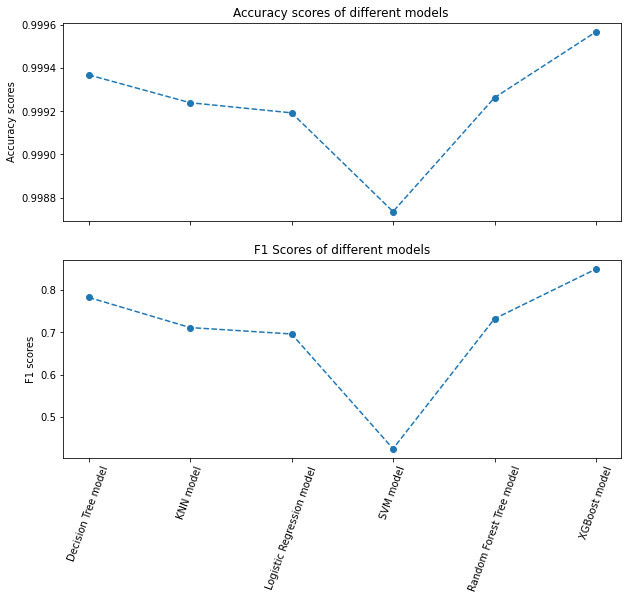

In [64]:
fig, ax = plt.subplots(2,1)

fig.set_size_inches([10,8])

ax[0].plot(accuracy_df, marker="o",linestyle="--")
ax[0].set_xticklabels([])
ax[0].set_ylabel("Accuracy scores")
ax[0].set_title("Accuracy scores of different models ")


ax[1].plot(f1_df,marker="o", linestyle="--")
ax[1].set_xticklabels(f1_df.index,rotation=70)
ax[1].set_ylabel("F1 scores")
ax[1].set_title("F1 Scores of different models")


plt.show()

### Summary 
It can be seen from the above visualizations and tables that the best model so far has been the XGboost followed by the Decision Tree model and closely after that the Random Forest Tree Model